In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
import klib

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.base import RegressorMixin
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean

from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
import sys, warnings
if not sys.warnoptions: warnings.simplefilter("ignore")

In [2]:
#matplotlib 한글깨짐 지원

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)  

In [3]:
df_train = pd.read_csv(os.path.abspath("../input")+'/X_train.csv',encoding='cp949')
df_test = pd.read_csv(os.path.abspath("../input")+'/X_test.csv',encoding='cp949')
df = pd.concat([df_train, df_test])
df = df.iloc[:,1:]
y_train = pd.read_csv(os.path.abspath("../input")+'/y_train.csv').age
IDtest = df_test.custid.unique()

In [4]:
X_train = pd.read_csv(os.path.abspath("../input")+'/1,2등,우리_selection_3.csv',encoding = 'utf-8')
del X_train['Unnamed: 0']
X_test = pd.read_csv(os.path.abspath("../input")+'/1,2등,우리_selection_3_te.csv',encoding = 'utf-8')
del X_test['Unnamed: 0']

### Word2Vec

2등팀

In [5]:
# 이름 비슷한거 통일
df_train.part_nm = df_train.part_nm.replace('여성캐쥬얼','여성캐주얼').replace('스포츠캐쥬얼','스포츠캐주얼').replace(
                    '가정용품파트','가정용품').replace('생식품파트','생식품').replace('공산품파트','공산품').replace(
                    '로얄부틱','로얄부띠끄').replace('잡화파트','잡화')
df_test.part_nm = df_test.part_nm.replace('여성캐쥬얼','여성캐주얼').replace('스포츠캐쥬얼','스포츠캐주얼').replace(
                    '가정용품파트','가정용품').replace('생식품파트','생식품').replace('공산품파트','공산품').replace(
                    '로얄부틱','로얄부띠끄').replace('잡화파트','잡화')

In [6]:
import random

df_train2=df_train.reset_index().drop('index',axis=1).copy()
df_train2=df_train2.reset_index()
df_train2['goodcd']=df_train2['goodcd'].astype('str')
train_data=list(df_train2.groupby('custid')['goodcd'].unique())

In [7]:
def oversample(x, n):
    lst = []
    for i in x:
        tmp = []
        for j in range(n):
            random.shuffle(i)
            tmp += list(i)
            lst.append(tmp)
    return lst

In [8]:
w2v_input = oversample(train_data, 5)

In [9]:
from gensim.models import word2vec

w2v = word2vec.Word2Vec(sentences = w2v_input, size = 100, window = 3, min_count = 1, sg = 1)

In [10]:
train_mean_vector = []
for words in tqdm(train_data):
    tmp = np.zeros(100)
    cnt = 0
    for word in words:
        try:
            tmp += w2v[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    train_mean_vector.append(tmp)
train_mean_vector = np.array(train_mean_vector)

100%|█████████████████████████████████████████████████████████████████████████| 21587/21587 [00:01<00:00, 12606.23it/s]


In [11]:
train_mean_vector = pd.DataFrame(train_mean_vector)
train_mean_vector

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.283791,-0.050281,-0.007656,0.178034,0.236759,0.017779,0.040338,0.154178,0.105275,-0.215779,...,-0.012480,-0.064567,0.040777,-0.035069,-0.072096,0.006261,-0.078448,0.063662,0.164905,0.163070
1,0.017825,-0.223440,-0.058704,-0.152061,0.203059,-0.090841,0.276941,0.116163,0.187634,-0.460228,...,-0.201304,0.081816,0.057577,-0.032714,-0.208261,-0.036719,0.024050,0.135946,0.139729,0.107890
2,0.035392,-0.058746,0.054776,-0.016871,0.163583,0.002982,0.063718,0.102341,0.231856,-0.139182,...,0.166908,0.166273,0.125130,-0.076201,-0.167320,0.138592,-0.028065,-0.049924,0.195874,0.093108
3,0.165272,-0.199079,-0.006269,0.347054,0.204303,0.068000,0.073598,0.314160,0.166679,0.001512,...,-0.288021,0.328796,0.104003,0.252447,0.320315,-0.049196,-0.332731,-0.030600,-0.100782,0.194198
4,0.098650,-0.181395,-0.003232,0.045498,0.127756,0.017652,0.128486,0.135487,0.205794,-0.122023,...,-0.002618,-0.048959,0.095109,0.096439,-0.090283,0.018215,-0.049068,0.016442,0.151370,0.061965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,-0.082637,-0.180599,-0.001161,0.042803,0.282800,0.097441,0.118945,0.157467,0.181970,-0.222227,...,0.016764,-0.009152,0.005992,0.146040,-0.097797,0.111061,-0.078044,0.135600,0.083455,0.074680
21583,0.052054,0.091477,-0.088446,0.114969,0.165270,0.098345,0.018825,0.091738,0.387188,-0.191748,...,-0.089167,0.136254,0.178465,-0.030418,-0.025913,-0.093027,-0.018902,0.178274,0.104639,0.089180
21584,0.049917,-0.005075,-0.266479,0.267714,0.394323,-0.108585,0.008774,-0.057414,0.162838,-0.288691,...,0.145233,0.159400,-0.021396,0.196714,-0.145535,0.047380,-0.133626,0.155075,0.217604,0.236421
21585,0.105741,-0.017090,-0.001632,0.198029,0.153529,-0.105175,0.059323,0.158513,0.251157,-0.183629,...,-0.060232,0.162374,0.057467,-0.128479,-0.050374,-0.007928,-0.027388,0.093300,0.057543,0.016938


In [12]:
# income_occyp_type, income_age_type, edu_occyp_type, edu_income_type, family_income_type

import random

df_test2=df_test.reset_index().drop('index',axis=1).copy()
df_test2=df_test2.reset_index()
df_test2['goodcd']=df_test2['goodcd'].astype('str')
test_data=list(df_test2.groupby('custid')['goodcd'].unique())

In [13]:
test_mean_vector = []
for words in tqdm(test_data):
    tmp = np.zeros(100)
    cnt = 0
    for word in words:
        try:
            tmp += w2v[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    test_mean_vector.append(tmp)
test_mean_vector = np.array(test_mean_vector)

100%|█████████████████████████████████████████████████████████████████████████| 14380/14380 [00:01<00:00, 12499.91it/s]


In [14]:
test_mean_vector = pd.DataFrame(test_mean_vector)
test_mean_vector

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.078607,-0.384791,-0.208701,-0.101400,0.297719,0.139836,0.117220,-0.057192,0.156885,-0.263970,...,0.155313,0.060030,-0.087081,0.004428,-0.202635,0.023013,-0.038525,0.012214,0.137333,0.005705
1,0.064788,-0.149454,-0.002265,0.090403,0.208622,0.004153,0.131721,0.099060,0.092871,-0.217380,...,0.068462,0.117343,0.125122,0.078101,-0.019921,0.128800,-0.026798,0.043696,0.138732,-0.018120
2,0.024367,-0.121005,-0.040276,0.218108,0.241740,0.026999,0.046158,0.081720,0.295630,-0.039567,...,-0.030033,-0.046877,0.195398,-0.024497,-0.023733,0.056084,-0.098948,0.001664,0.072226,0.103541
3,0.067149,0.061351,-0.213907,0.193432,0.134592,0.002254,0.038177,0.048345,0.281675,-0.171875,...,-0.056590,0.168774,0.014232,-0.085480,0.106422,-0.040879,0.019931,0.196038,0.078594,0.119652
4,0.043385,-0.078171,-0.056543,0.112753,0.167677,-0.072644,0.009576,0.085842,0.356883,-0.243266,...,0.081228,0.061278,0.118913,-0.036994,0.055736,-0.044568,0.098470,0.155999,0.011104,0.071862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,0.030433,-0.312307,-0.112449,0.122401,0.170529,0.186825,0.286259,-0.113062,0.057071,-0.182170,...,0.046654,-0.004020,-0.004415,-0.003398,-0.100607,0.078332,-0.006141,0.158661,-0.092133,0.026120
14376,0.051246,0.025032,-0.109494,0.019633,0.093907,0.003222,0.020551,0.062630,0.189653,-0.285591,...,0.023654,-0.074430,0.004376,-0.185388,-0.000647,-0.051517,0.073987,0.064200,0.127101,0.178564
14377,0.261026,-0.073703,0.003633,0.031292,0.084824,0.015503,0.039759,-0.006579,0.002877,-0.052374,...,0.107210,0.093143,0.240748,0.038904,-0.168023,0.115399,-0.113008,0.018020,0.089099,0.225487
14378,0.074278,-0.139735,0.131397,0.207560,0.300473,-0.088186,0.157756,0.000952,0.339465,-0.150146,...,0.126725,-0.057490,0.160065,0.065754,0.006073,0.058185,-0.155054,0.145602,-0.150387,0.005843


In [15]:
# income_occyp_type, income_age_type, edu_occyp_type, edu_income_type, family_income_type

import random

df_train2=df_train.reset_index().drop('index',axis=1).copy()
df_train2=df_train2.reset_index()
train_data=list(df_train2.groupby('custid')['brd_nm'].unique())

In [16]:
def oversample(x, n):
    lst = []
    for i in x:
        tmp = []
        for j in range(n):
            random.shuffle(i)
            tmp += list(i)
            lst.append(tmp)
    return lst

In [17]:
w2v_input = oversample(train_data, 5)

In [18]:
from gensim.models import word2vec

w2v = word2vec.Word2Vec(sentences = w2v_input, size = 100, window = 3, min_count = 1, sg = 1)

In [19]:
train_mean_vector_2 = []
for words in tqdm(train_data):
    tmp = np.zeros(100)
    cnt = 0
    for word in words:
        try:
            tmp += w2v[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    train_mean_vector_2.append(tmp)
train_mean_vector_2 = np.array(train_mean_vector_2)

100%|█████████████████████████████████████████████████████████████████████████| 21587/21587 [00:01<00:00, 13740.78it/s]


In [20]:
train_mean_vector_2 = pd.DataFrame(train_mean_vector_2)
train_mean_vector_2

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.024012,0.082960,-0.161106,0.075575,-0.190014,-0.317254,0.112045,-0.183626,0.033892,0.029367,...,-0.098816,-0.100555,0.313949,-0.111634,0.173171,0.272212,-0.059011,-0.002401,-0.052501,-0.156928
1,0.047850,0.046644,-0.329489,0.032138,-0.265717,-0.140872,0.025641,-0.210246,-0.124631,0.124902,...,-0.213183,-0.142156,0.313448,-0.156997,0.131756,0.163455,-0.031268,-0.115967,-0.099366,-0.158376
2,0.154651,-0.059763,-0.290284,0.079880,-0.255421,-0.048619,0.103864,-0.204818,-0.064616,0.074409,...,-0.203599,-0.132139,0.264714,-0.159710,0.142480,0.104845,-0.015608,-0.083272,-0.011037,-0.099208
3,0.144861,-0.100373,-0.262803,0.006320,-0.051244,-0.053951,0.117251,-0.244287,-0.027910,0.187616,...,-0.369525,-0.105784,0.159158,0.179988,-0.126638,0.220938,-0.135043,-0.133420,-0.126505,-0.186608
4,0.005303,0.015147,-0.220749,0.064065,-0.248485,-0.077357,0.057167,-0.224697,0.013528,0.060526,...,-0.205174,-0.140812,0.275970,-0.139775,0.072892,0.151155,-0.035771,-0.040769,-0.000422,-0.141685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,-0.004175,0.009174,-0.267954,0.140193,-0.101175,-0.159374,0.037580,-0.228788,-0.018237,0.056790,...,-0.108973,-0.195196,0.172390,-0.052001,0.141404,0.142370,-0.015802,0.027973,-0.009533,-0.227309
21583,0.214703,-0.071302,-0.225131,0.133922,-0.075083,-0.092694,0.086236,-0.265836,-0.002203,0.046153,...,-0.195409,-0.153410,0.231737,-0.124948,0.102048,0.246969,-0.086872,-0.058530,-0.000793,-0.139766
21584,-0.024838,0.020265,-0.231673,0.167059,-0.175189,-0.214675,0.091244,-0.332846,-0.116236,0.113043,...,-0.098468,-0.025516,0.155703,-0.114113,0.122392,0.151620,0.048279,-0.119140,0.085560,-0.274117
21585,0.002507,-0.053647,-0.225622,-0.050344,-0.140320,-0.060894,0.043472,-0.081022,-0.084272,0.002905,...,-0.313941,-0.115882,0.181369,-0.229113,0.074386,0.181461,-0.057493,-0.110673,0.081814,-0.197217


In [21]:
# income_occyp_type, income_age_type, edu_occyp_type, edu_income_type, family_income_type

import random

df_test2=df_test.reset_index().drop('index',axis=1).copy()
df_test2=df_test2.reset_index()
test_data=list(df_test2.groupby('custid')['brd_nm'].unique())

In [22]:
test_mean_vector_2 = []
for words in tqdm(test_data):
    tmp = np.zeros(100)
    cnt = 0
    for word in words:
        try:
            tmp += w2v[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    test_mean_vector_2.append(tmp)
test_mean_vector_2 = np.array(test_mean_vector_2)

100%|█████████████████████████████████████████████████████████████████████████| 14380/14380 [00:01<00:00, 13738.43it/s]


In [23]:
test_mean_vector_2 = pd.DataFrame(test_mean_vector_2)
test_mean_vector_2

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.022470,0.089052,-0.164424,0.053617,-0.227592,-0.106952,0.059496,-0.213720,-0.129440,0.068346,...,-0.166260,-0.189357,0.295270,-0.030635,0.217527,0.162548,-0.023307,-0.113963,-0.065914,-0.202465
1,0.051436,0.017282,-0.202082,0.120292,-0.172270,-0.082518,0.127015,-0.233970,-0.059287,0.049817,...,-0.158408,-0.135473,0.245603,-0.117983,0.120640,0.150836,-0.018752,-0.090041,-0.016067,-0.195599
2,0.110584,-0.065110,-0.223242,0.191645,-0.105046,-0.094250,0.070826,-0.349761,0.005965,0.047238,...,-0.192015,-0.163939,0.269767,-0.143308,0.163355,0.113684,-0.072931,-0.016759,-0.067570,-0.128410
3,0.109234,-0.006376,-0.333903,0.131748,-0.004335,-0.134465,0.101026,-0.185764,-0.055664,-0.021070,...,-0.037604,-0.091053,0.187787,-0.072448,0.028769,0.099888,-0.175134,-0.012046,0.055591,-0.090380
4,0.099566,-0.073966,-0.260349,0.190952,-0.148272,-0.122627,0.110395,-0.306787,0.014802,0.100845,...,-0.214052,-0.089407,0.219576,-0.130213,0.108524,0.195205,-0.072863,0.089949,0.003600,-0.133025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,0.008514,-0.001783,-0.205799,0.018175,-0.246633,-0.158750,-0.049936,-0.222924,0.004277,0.026448,...,-0.212121,-0.146249,0.279636,0.079891,0.009870,-0.021673,-0.089013,0.191872,0.159881,-0.191984
14376,0.029069,-0.083684,-0.408885,0.001336,-0.253643,-0.196840,0.139412,-0.225484,0.131910,0.035793,...,-0.226417,-0.005740,0.323965,-0.036904,0.041077,0.231288,-0.017167,-0.044144,0.102213,-0.170454
14377,-0.126702,-0.037786,-0.238795,0.151257,-0.178518,0.053819,-0.014637,-0.103524,-0.036020,0.143732,...,-0.164747,-0.062606,0.177853,0.055455,0.201870,-0.070376,0.141864,0.140923,0.058904,-0.065783
14378,0.094430,0.102122,-0.253927,0.084792,-0.323984,-0.046793,0.077119,-0.391877,-0.008202,0.076213,...,-0.309415,-0.190775,0.261339,-0.065630,0.047081,-0.005523,-0.155183,-0.088867,-0.091681,0.008906


1등팀
- bnd_nm은 2등조꺼에 있어서 그거 제외하고 

In [24]:
# 구매 정보 관련
df_train['customer_info'] = df_train['corner_nm'].astype(str) + '_' + df_train['pc_nm'].astype(str) + '_' + df_train['part_nm'].astype(str)

df_test['customer_info'] = df_test['corner_nm'].astype(str) + '_' + df_test['pc_nm'].astype(str) + '_' + df_test['part_nm'].astype(str)

In [25]:
import random

train_data = list(df_train.groupby('custid')['customer_info'].unique())
test_data = list(df_test.groupby('custid')['customer_info'].unique())

In [26]:
def oversample(x, n):
    lst = []
    for i in x:
        tmp = []
        for j in range(n):
            random.shuffle(i)
            tmp += list(i)
            lst.append(tmp)
    return lst

In [27]:
w2v_input = oversample(train_data, 5)

In [28]:
from gensim.models import word2vec

w2v = word2vec.Word2Vec(sentences = w2v_input, size = 100, window = 3, min_count = 1, sg = 1)

In [29]:
train_mean_vector_3 = []
for words in tqdm(train_data):
    tmp = np.zeros(100)
    cnt = 0
    for word in words:
        try:
            tmp += w2v[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    train_mean_vector_3.append(tmp)
train_mean_vector_3 = np.array(train_mean_vector_3)

100%|█████████████████████████████████████████████████████████████████████████| 21587/21587 [00:01<00:00, 13869.27it/s]


In [30]:
train_mean_vector_3 = pd.DataFrame(train_mean_vector_3)
train_mean_vector_3

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.214152,0.059694,0.063638,0.275209,0.087180,-0.015718,0.202468,-0.155580,0.082022,0.080894,...,-0.295021,0.015224,-0.085803,-0.017163,0.241489,-0.208088,-0.046345,0.154272,0.073888,0.368235
1,-0.200145,0.077470,0.000210,0.373071,0.170091,0.072763,0.171560,-0.183227,0.198091,0.012313,...,-0.105882,0.059173,-0.150423,0.078810,0.198285,-0.226103,-0.068757,0.157827,0.156703,0.344351
2,0.070081,-0.028984,-0.036689,0.360810,0.064423,0.147597,0.018516,-0.183981,0.263759,-0.258280,...,0.120622,0.081567,-0.089909,0.089981,0.100474,-0.050191,-0.218991,0.134144,-0.014542,0.447933
3,-0.281686,0.290718,0.045572,0.195177,0.233189,-0.061636,0.192963,-0.064943,0.135768,0.040863,...,-0.085728,-0.066094,-0.200175,0.036822,0.325111,-0.042073,-0.143409,0.066052,0.072083,0.474343
4,-0.020338,-0.017292,0.051763,0.157635,0.006180,-0.005986,0.017650,-0.247777,0.149466,-0.067876,...,-0.173144,0.028552,0.090246,-0.063893,0.111860,-0.080498,-0.013269,0.132335,-0.119006,0.564856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,-0.191531,0.137958,0.078802,0.217237,0.081740,-0.081800,0.126469,-0.168641,0.136243,-0.029975,...,-0.209881,0.034271,-0.027030,-0.032533,0.195646,-0.075706,0.007881,0.116198,0.009826,0.479815
21583,-0.245836,0.012284,-0.011674,0.173417,-0.030170,-0.049019,0.024044,-0.049728,0.185459,0.078994,...,-0.070734,-0.096329,-0.150208,-0.004538,0.358874,-0.059207,-0.124435,0.027611,0.117796,0.408944
21584,-0.155466,0.028397,-0.021932,0.198112,0.068626,-0.071055,0.003174,-0.178316,0.136336,-0.002765,...,-0.177746,-0.029256,-0.028575,-0.031178,0.143789,-0.074886,0.050590,0.138825,0.059464,0.465317
21585,-0.140651,0.138635,0.087468,0.268056,0.114306,-0.073104,0.122643,-0.085929,0.115951,0.056628,...,-0.139405,-0.010766,-0.055575,0.103473,0.332305,-0.172430,-0.042105,-0.042856,0.224418,0.371470


In [31]:
test_mean_vector_3 = []
for words in tqdm(test_data):
    tmp = np.zeros(100)
    cnt = 0
    for word in words:
        try:
            tmp += w2v[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    test_mean_vector_3.append(tmp)
test_mean_vector_3 = np.array(test_mean_vector_3)

100%|█████████████████████████████████████████████████████████████████████████| 14380/14380 [00:00<00:00, 14538.63it/s]


In [32]:
test_mean_vector_3 = pd.DataFrame(test_mean_vector_3)
test_mean_vector_3

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.050923,0.070014,0.106812,0.193688,0.041939,0.006534,0.026603,-0.206479,0.088974,-0.112701,...,-0.211298,0.054395,0.045683,-0.104420,0.106116,-0.106419,0.002582,0.142707,-0.075431,0.502721
1,-0.137219,0.085148,0.022915,0.235048,0.036127,-0.022231,0.051900,-0.186385,0.173922,0.017763,...,-0.188980,-0.035474,-0.002032,-0.031944,0.237781,-0.107442,-0.048260,0.123217,-0.009392,0.473176
2,0.164426,-0.162708,-0.128938,0.096421,0.055251,-0.124622,-0.277999,-0.170722,0.150226,0.118188,...,-0.036288,-0.260708,0.150944,0.007405,0.158689,0.131214,-0.013883,0.049589,-0.210129,0.607034
3,0.177506,0.002148,-0.046592,0.148805,0.279061,-0.084728,-0.421307,0.116260,-0.017788,0.081487,...,-0.292757,-0.432086,0.346988,-0.055379,0.056998,0.132311,0.021331,0.022023,-0.325134,0.754797
4,0.037784,-0.080323,-0.018799,0.169643,0.096563,-0.143894,-0.147603,-0.111378,0.220746,0.133223,...,-0.075067,-0.140649,-0.016175,0.089351,0.192156,0.027438,-0.104006,0.038880,0.021898,0.533771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,-0.087295,0.057672,0.026080,0.186311,-0.016190,0.068914,0.023930,-0.228352,0.041294,-0.204488,...,-0.346201,0.151738,0.122129,-0.091248,0.155237,-0.237031,-0.027505,0.269435,-0.152758,0.640961
14376,-0.248299,0.045964,0.086533,0.202472,0.091081,-0.074330,0.131681,-0.039350,0.081035,0.230851,...,-0.175910,-0.086061,-0.116478,-0.036107,0.371446,-0.123116,-0.074086,0.111789,0.130616,0.366914
14377,-0.138200,0.033724,0.118701,0.257772,0.042876,-0.063808,0.169150,-0.281695,0.055391,-0.094748,...,-0.288219,0.048889,0.213041,-0.044287,0.157462,-0.047739,-0.094494,0.280045,-0.030085,0.525894
14378,0.148807,-0.081231,-0.064753,0.168878,0.013300,-0.023835,-0.129184,-0.211199,0.139794,0.076561,...,-0.004871,-0.101335,0.035484,-0.118409,0.127969,-0.025560,-0.039899,0.075971,-0.034627,0.570085


In [33]:
# 계절 분리
df_train['sales_season'] = df_train['sales_month'].apply(lambda x : 'SPRING' if (x>=3) and (x<=5)
                                                  else 'SUMMER' if (x>=6) and (x<=8)
                                                  else 'FALL' if (x>=9) and (x<=11)
                                                  else 'WINTER')

df_test['sales_season'] = df_test['sales_month'].apply(lambda x : 'SPRING' if (x>=3) and (x<=5)
                                                  else 'SUMMER' if (x>=6) and (x<=8)
                                                  else 'FALL' if (x>=9) and (x<=11)
                                                  else 'WINTER')

In [34]:
# 요일명을 영어로 변경 - lgbm에서 한글 피처 명이 있으면 안됨
df_train['sales_dayofweek'] = df_train['sales_dayofweek'].apply(lambda x : 'MONDAY' if x == '월'
                                                         else 'TUESDAY' if x == '화'
                                                         else 'WEDNESDAY' if x == '수'
                                                         else 'THURSDAY' if x == '목'
                                                         else 'FRIDAY' if x == '금'
                                                         else 'SATURDAY' if x == '토'
                                                         else 'SUNDAY')

df_test['sales_dayofweek'] = df_test['sales_dayofweek'].apply(lambda x : 'MONDAY' if x == '월'
                                                         else 'TUESDAY' if x == '화'
                                                         else 'WEDNESDAY' if x == '수'
                                                         else 'THURSDAY' if x == '목'
                                                         else 'FRIDAY' if x == '금'
                                                         else 'SATURDAY' if x == '토'
                                                         else 'SUNDAY')

In [35]:
# 지점명을 영어로 변경
df_train['str_nm'] = df_train['str_nm'].apply(lambda x : 'MUYEOK_BRANCH' if x == '무역점'
                                                         else 'SHINCHON_BRANCH' if x == '신촌점'
                                                         else 'HEAD_OFFICE' if x == '본점'
                                                         else 'CHUNHO_BRANCH')

df_test['str_nm'] = df_test['str_nm'].apply(lambda x : 'MUYEOK_BRANCH' if x == '무역점'
                                                         else 'SHINCHON_BRANCH' if x == '신촌점'
                                                         else 'HEAD_OFFICE' if x == '본점'
                                                         else 'CHUNHO_BRANCH')

In [36]:
# 시간대 구분 (회사원 기준)
df_train['time_split'] = df_train['sales_time'].apply(lambda x : 'MORNINGTIME' if (x>=700) and (x<=1130)
                                               else 'LUNCHTIME' if (x>1130) and (x<=1300)
                                               else 'AFTERNOON' if (x>1300) and (x<=1900)
                                               else 'RESTTIME')

df_test['time_split'] = df_test['sales_time'].apply(lambda x : 'MORNINGTIME' if (x>=700) and (x<=1130)
                                               else 'LUNCHTIME' if (x>1130) and (x<=1300)
                                               else 'AFTERNOON' if (x>1300) and (x<=1900)
                                               else 'RESTTIME')

In [37]:
# 구매시간 정보
df_train['customer_info_time'] = df_train['str_nm'].astype(str) + '_' + df_train['sales_dayofweek'].astype(str) + '_' + df_train['sales_season'].astype(str) + '_' + df_train['time_split'].astype(str)

df_test['customer_info_time'] = df_test['str_nm'].astype(str) + '_' + df_test['sales_dayofweek'].astype(str) + '_' + df_test['sales_season'].astype(str) + '_' + df_test['time_split'].astype(str)

In [38]:
import random

train_data = list(df_train.groupby('custid')['customer_info_time'].unique())
test_data = list(df_test.groupby('custid')['customer_info_time'].unique())

In [39]:
w2v_input = oversample(train_data, 5)

In [40]:
from gensim.models import word2vec

w2v = word2vec.Word2Vec(sentences = w2v_input, size = 100, window = 3, min_count = 1, sg = 1)

In [41]:
train_mean_vector_4 = []
for words in tqdm(train_data):
    tmp = np.zeros(100)
    cnt = 0
    for word in words:
        try:
            tmp += w2v[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    train_mean_vector_4.append(tmp)
train_mean_vector_4 = np.array(train_mean_vector_4)

100%|█████████████████████████████████████████████████████████████████████████| 21587/21587 [00:01<00:00, 16457.69it/s]


In [42]:
train_mean_vector_4 = pd.DataFrame(train_mean_vector_4)
train_mean_vector_4

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.116829,-0.231285,0.150350,-0.037589,0.092419,0.096728,0.041500,-0.126647,0.152865,-0.163317,...,-0.409076,0.076436,0.282933,-0.072689,0.059024,-0.075757,0.014211,0.047043,0.024236,-0.041583
1,0.048951,0.083964,0.072645,0.041484,0.006582,-0.011906,-0.018661,-0.220288,0.080285,-0.237280,...,-0.100905,-0.151088,0.136187,-0.003463,-0.052550,-0.089917,-0.122872,-0.093780,-0.110037,0.136311
2,-0.078629,0.147438,0.332267,-0.031733,0.168087,-0.044577,0.141592,-0.292208,0.241194,-0.338812,...,0.017386,-0.312201,0.366233,0.062654,-0.230994,-0.176973,-0.079737,-0.157807,-0.035431,0.077854
3,0.181854,-0.028915,-0.051929,0.123760,-0.064609,0.183536,0.011300,-0.147965,-0.005523,-0.212046,...,-0.185693,-0.035750,0.002919,0.029127,-0.232041,-0.059759,0.009806,-0.064963,0.023201,0.021975
4,0.086552,-0.177393,0.261082,-0.066780,-0.152439,0.008051,0.016883,-0.314935,0.252334,-0.139389,...,-0.285942,0.098637,0.177789,0.069482,0.084203,-0.055127,-0.013543,0.089589,-0.022391,-0.015530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,0.099689,-0.046745,0.121053,0.013076,-0.070894,0.066042,0.062633,-0.180025,0.070433,-0.094404,...,-0.232299,0.028400,0.122707,0.062246,-0.078723,-0.051933,0.017918,-0.017502,0.004434,0.021140
21583,0.041535,-0.015651,0.046830,0.087825,-0.068154,0.120399,0.107075,-0.067017,0.015411,-0.064894,...,-0.149504,-0.144073,0.163271,0.083935,-0.078559,0.009796,0.003155,-0.090384,0.007402,0.117689
21584,0.051172,-0.151348,0.218512,-0.031963,-0.089003,0.006880,0.096597,-0.192859,0.093454,-0.031088,...,-0.299188,0.080601,0.203908,0.037904,-0.010662,-0.049893,0.090714,-0.035802,-0.027699,0.015297
21585,-0.009923,0.070297,0.001328,0.065186,-0.016633,0.117352,0.072404,-0.149431,0.037280,-0.085051,...,-0.214407,-0.054649,-0.033575,0.066282,-0.138675,-0.096492,-0.018008,-0.023479,-0.066455,0.097624


In [43]:
test_mean_vector_4 = []
for words in tqdm(test_data):
    tmp = np.zeros(100)
    cnt = 0
    for word in words:
        try:
            tmp += w2v[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    test_mean_vector_4.append(tmp)
test_mean_vector_4 = np.array(test_mean_vector_4)

100%|█████████████████████████████████████████████████████████████████████████| 14380/14380 [00:00<00:00, 16521.97it/s]


In [44]:
test_mean_vector_4 = pd.DataFrame(test_mean_vector_4)
test_mean_vector_4

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.058670,-0.230848,0.231260,-0.059962,-0.099820,-0.010099,0.126986,-0.206492,0.132267,-0.232560,...,-0.366710,0.132119,0.235840,0.001814,0.103875,-0.029707,0.076300,0.113667,-0.113440,-0.050051
1,0.068594,-0.099389,0.069215,0.030011,-0.075458,0.067428,-0.003905,-0.123219,0.127240,-0.119427,...,-0.247080,0.041831,0.166134,0.068310,-0.057129,-0.064364,0.010553,-0.015226,-0.013195,0.059112
2,-0.101939,-0.245460,0.418235,-0.279017,0.123537,0.044748,-0.060836,-0.487954,0.246949,0.009964,...,-0.136711,-0.171972,-0.026924,-0.041102,0.156346,-0.091654,-0.162233,0.141836,-0.244092,0.156489
3,-0.145979,-0.555312,0.485891,-0.459907,-0.103470,0.056561,0.025535,-0.334766,0.267302,-0.346468,...,-0.006469,-0.392034,0.221685,0.055796,0.076487,0.116732,-0.431597,0.238728,-0.261415,0.000007
4,-0.078766,-0.200470,0.111670,0.048941,-0.050876,0.131986,0.083506,-0.204145,0.066384,0.008470,...,-0.181841,-0.135486,0.149498,0.007319,-0.050307,-0.114734,0.038273,-0.035905,-0.138813,0.019895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,0.152638,-0.105240,0.225956,-0.033085,0.041584,-0.107490,-0.114711,-0.260957,0.330944,-0.086719,...,-0.446111,0.342048,0.212538,0.021918,0.348211,0.029494,0.274351,-0.113434,-0.104944,-0.051660
14376,-0.012931,0.104481,0.087510,0.083617,-0.006206,0.234636,0.103269,0.021768,0.066119,0.004261,...,-0.253048,-0.079590,0.115039,0.186410,0.063076,0.098857,0.077680,-0.262197,-0.148981,0.265060
14377,0.058691,-0.208843,0.235394,-0.214942,-0.140862,0.060121,-0.048833,-0.245916,0.176492,-0.093320,...,-0.302314,0.167195,0.348861,-0.006159,0.111722,-0.045228,0.046511,0.102868,0.004551,-0.034762
14378,-0.173305,-0.412778,0.534263,-0.252202,0.212893,0.033868,-0.106528,-0.482871,0.287972,-0.050756,...,-0.143937,-0.054711,0.039179,-0.179495,0.166616,-0.291450,-0.040861,0.045964,-0.374367,-0.015665


In [45]:
X_train = pd.concat([X_train, train_mean_vector], axis=1)
X_test = pd.concat([X_test, test_mean_vector], axis=1)

In [46]:
X_train = pd.concat([X_train, train_mean_vector_2], axis=1)
X_test = pd.concat([X_test, test_mean_vector_2], axis=1)

In [47]:
X_train = pd.concat([X_train, train_mean_vector_3], axis=1)
X_test = pd.concat([X_test, test_mean_vector_3], axis=1)

In [48]:
X_train = pd.concat([X_train, train_mean_vector_4], axis=1)
X_test = pd.concat([X_test, test_mean_vector_4], axis=1)

## feature selection

In [49]:
#X_train = df.iloc[:21587]
#X_test = df.iloc[21587:]

In [50]:
X_train.shape, X_test.shape

((21587, 7751), (14380, 7751))

100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [58:29<00:00, 109.66s/it]


(98, -8.108714424858865)


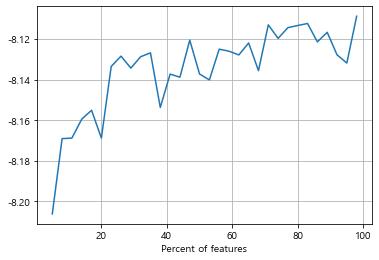

In [51]:
# 사용할 모델 설정 (속도가 빠른 모델 사용 권장)
model = LGBMRegressor(random_state=0)

# 각 특성과 타깃(class) 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법 
cv_scores = []
for p in tqdm(range(5,100,3)):
    X_new = SelectPercentile(percentile=p).fit_transform(X_train, y_train)    
    cv_score = cross_val_score(model, X_new, y_train, scoring='neg_root_mean_squared_error', cv=5).mean()
    cv_scores.append((p,cv_score))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [52]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
fs = SelectPercentile(percentile=best_score[0]).fit(X_train, y_train)
X_train = fs.transform(X_train)
X_test = fs.transform(X_test)

In [53]:
print(X_train.shape)

(21587, 7595)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 18 but corresponding boolean dimension is 7751

In [54]:
pd.DataFrame(X_train).to_csv('1,2등,우리_selection_3_W2V_2.csv')

In [55]:
pd.DataFrame(X_test).to_csv('1,2등,우리_selection_3_W2V_2_te.csv')